In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
import warnings

In [4]:
# Load the dataset
url = "2012_SAT_Results.csv"
data = pd.read_csv(url)

# Remove rows with "s" values in the specified columns
data = data[~data['Num of SAT Test Takers'].str.contains('s', na=False)]
data = data[~data['SAT Critical Reading Avg. Score'].str.contains('s', na=False)]
data = data[~data['SAT Math Avg. Score'].str.contains('s', na=False)]
data = data[~data['SAT Writing Avg. Score'].str.contains('s', na=False)]

# Set environment variable to avoid memory leak warning
os.environ["OMP_NUM_THREADS"] = "2"

# Suppress FutureWarning related to use_inf_as_na
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

In [5]:
# Display the first few rows of the dataset
data.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [6]:
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
           DBN                                    SCHOOL NAME  \
count      421                                            421   
unique     421                                            421   
top     01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
freq         1                                              1   

       Num of SAT Test Takers SAT Critical Reading Avg. Score  \
count                     421                             421   
unique                    174                             163   
top                        54                             398   
freq                       10                               8   

       SAT Math Avg. Score SAT Writing Avg. Score  
count                  421                    421  
unique                 172                    162  
top                    385                    370  
freq                     9                      9  


**PLOT THE CSV**

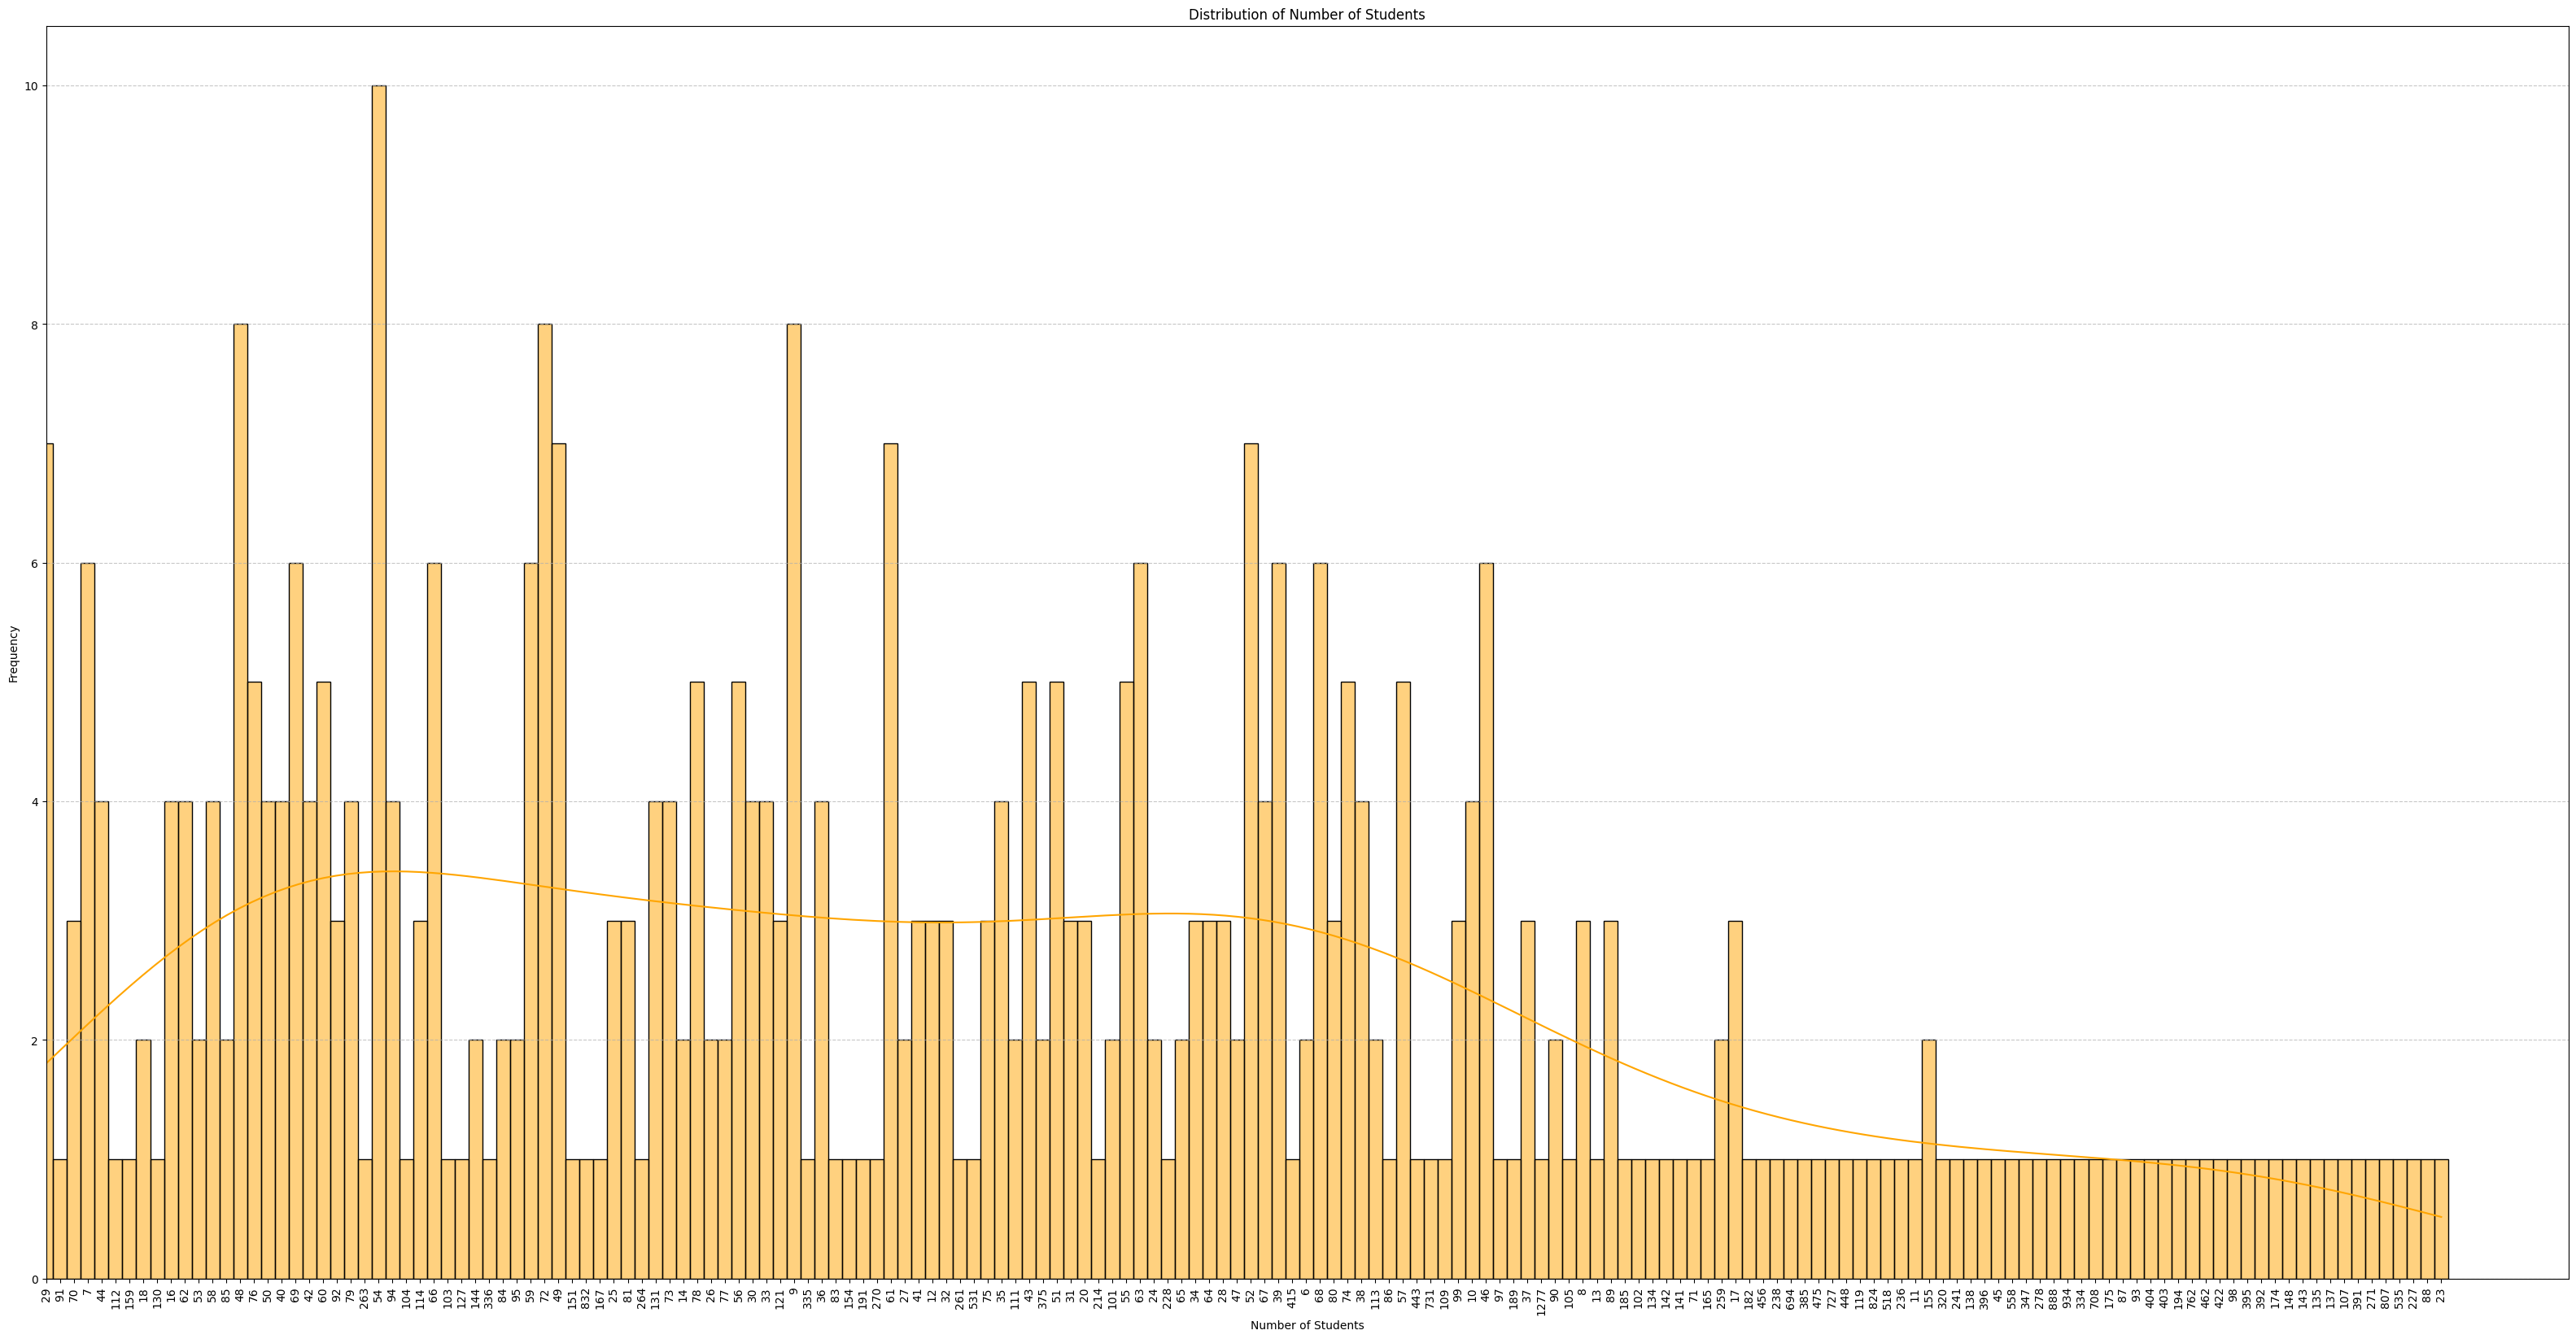

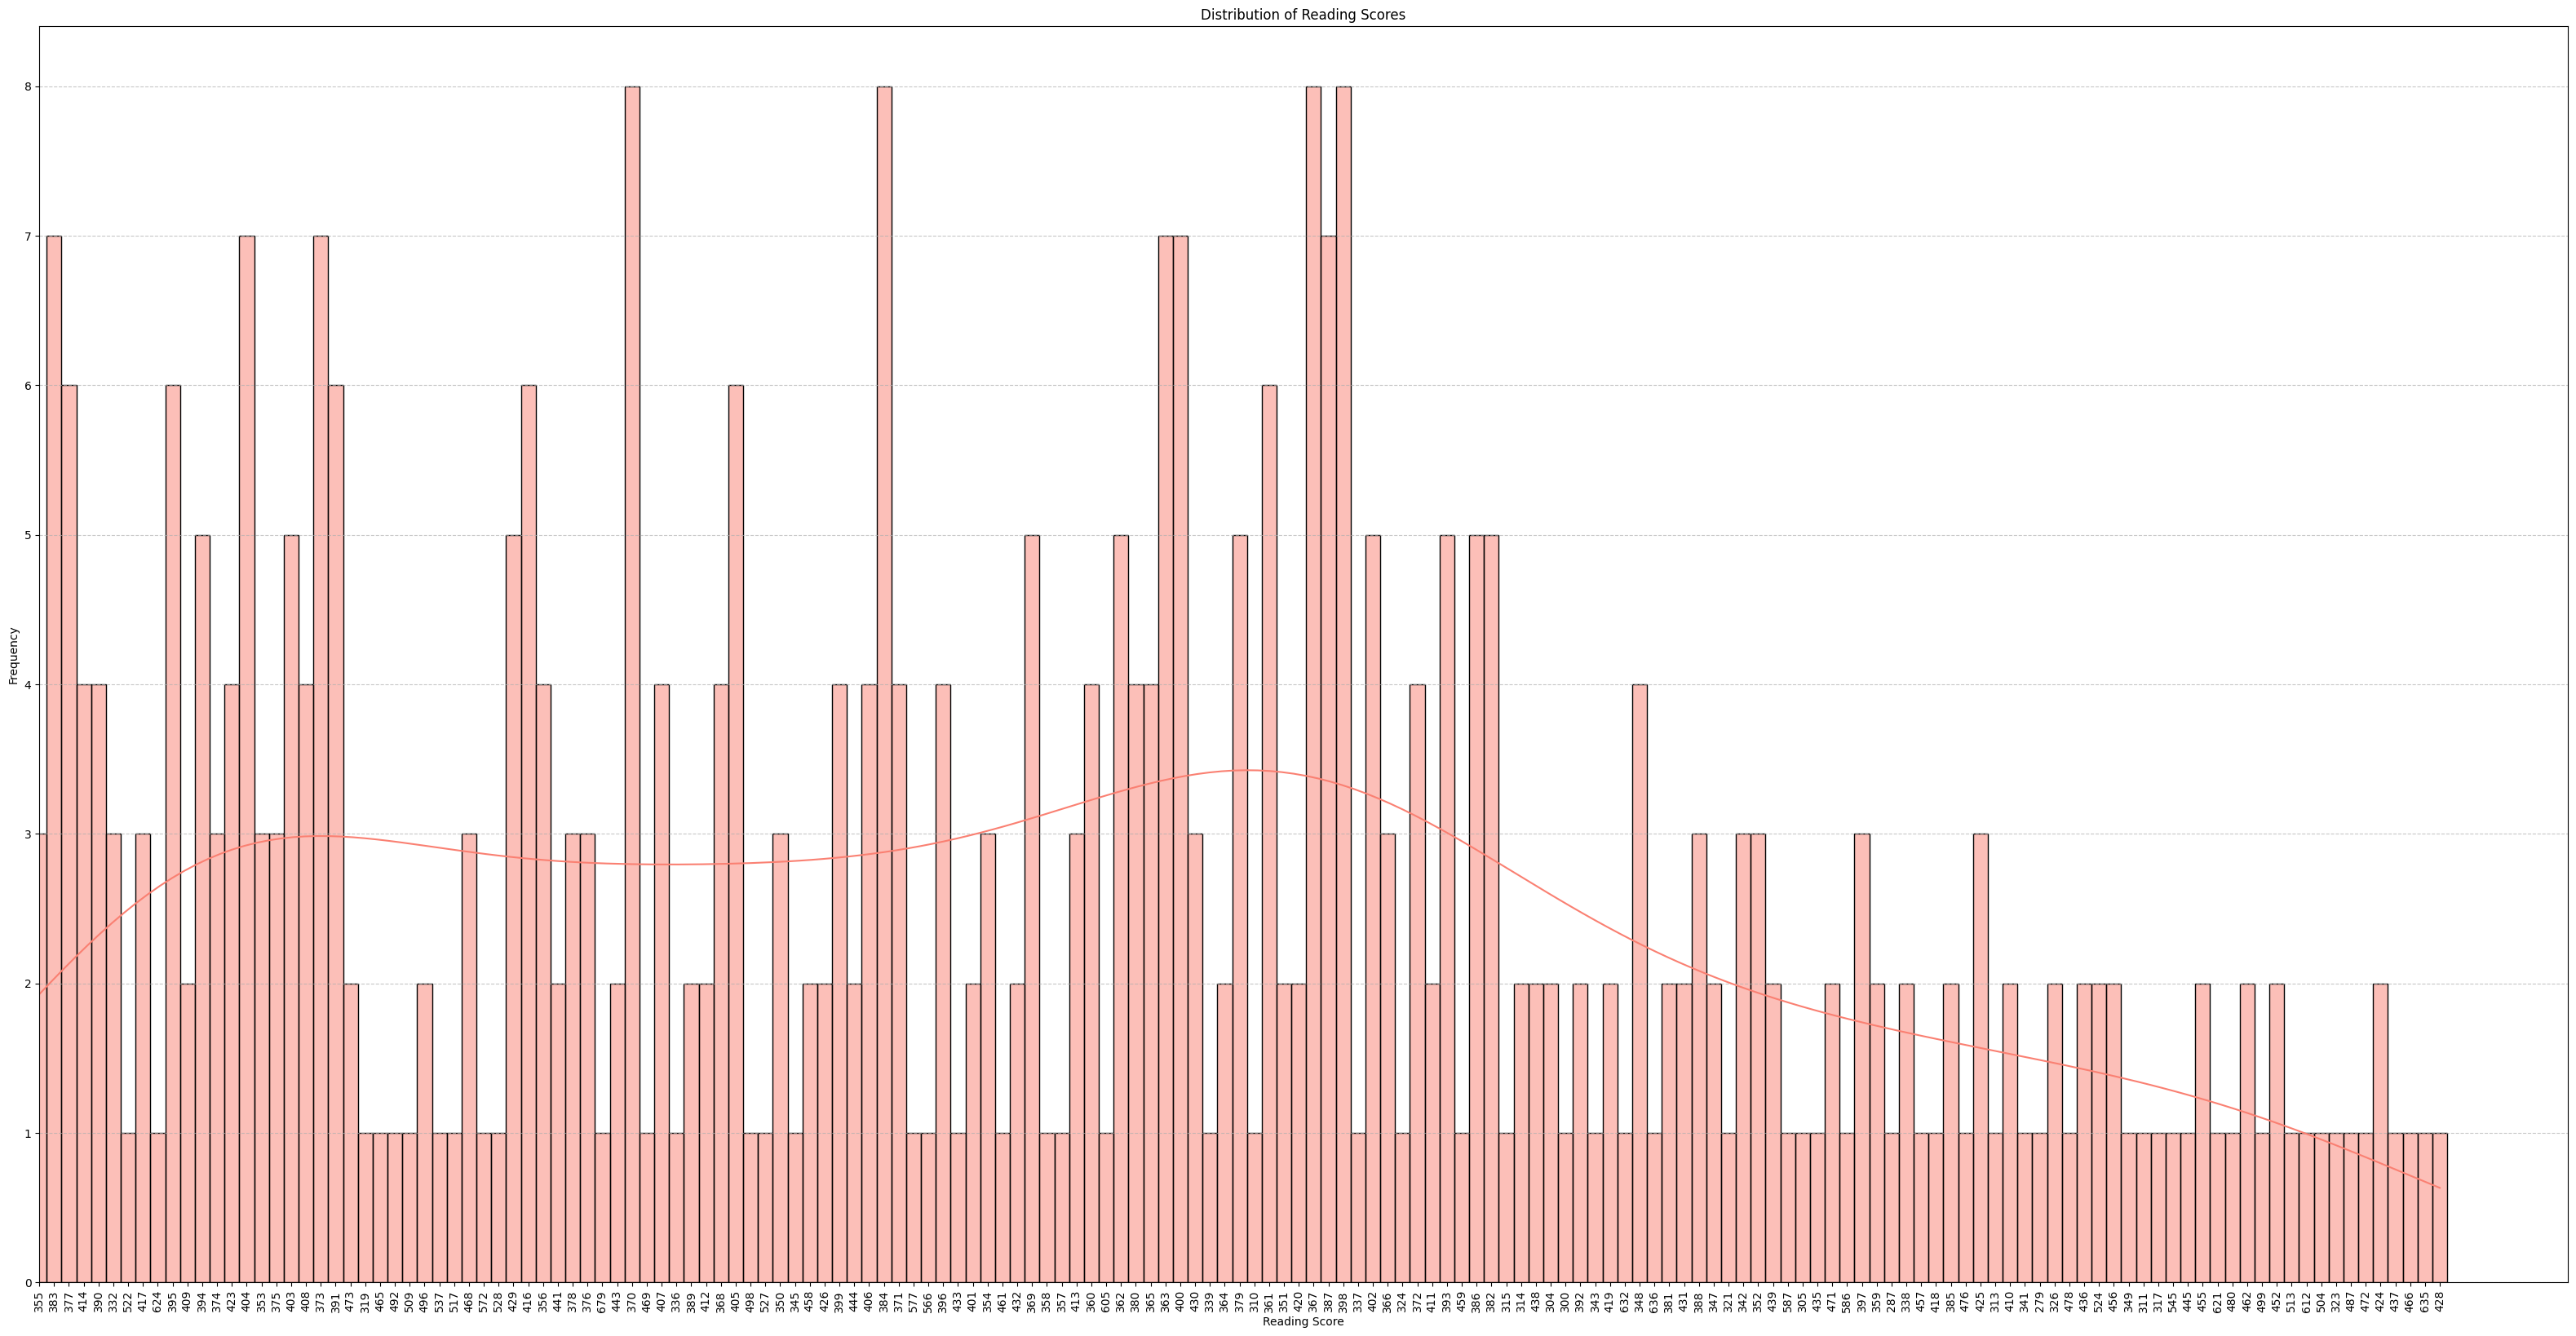

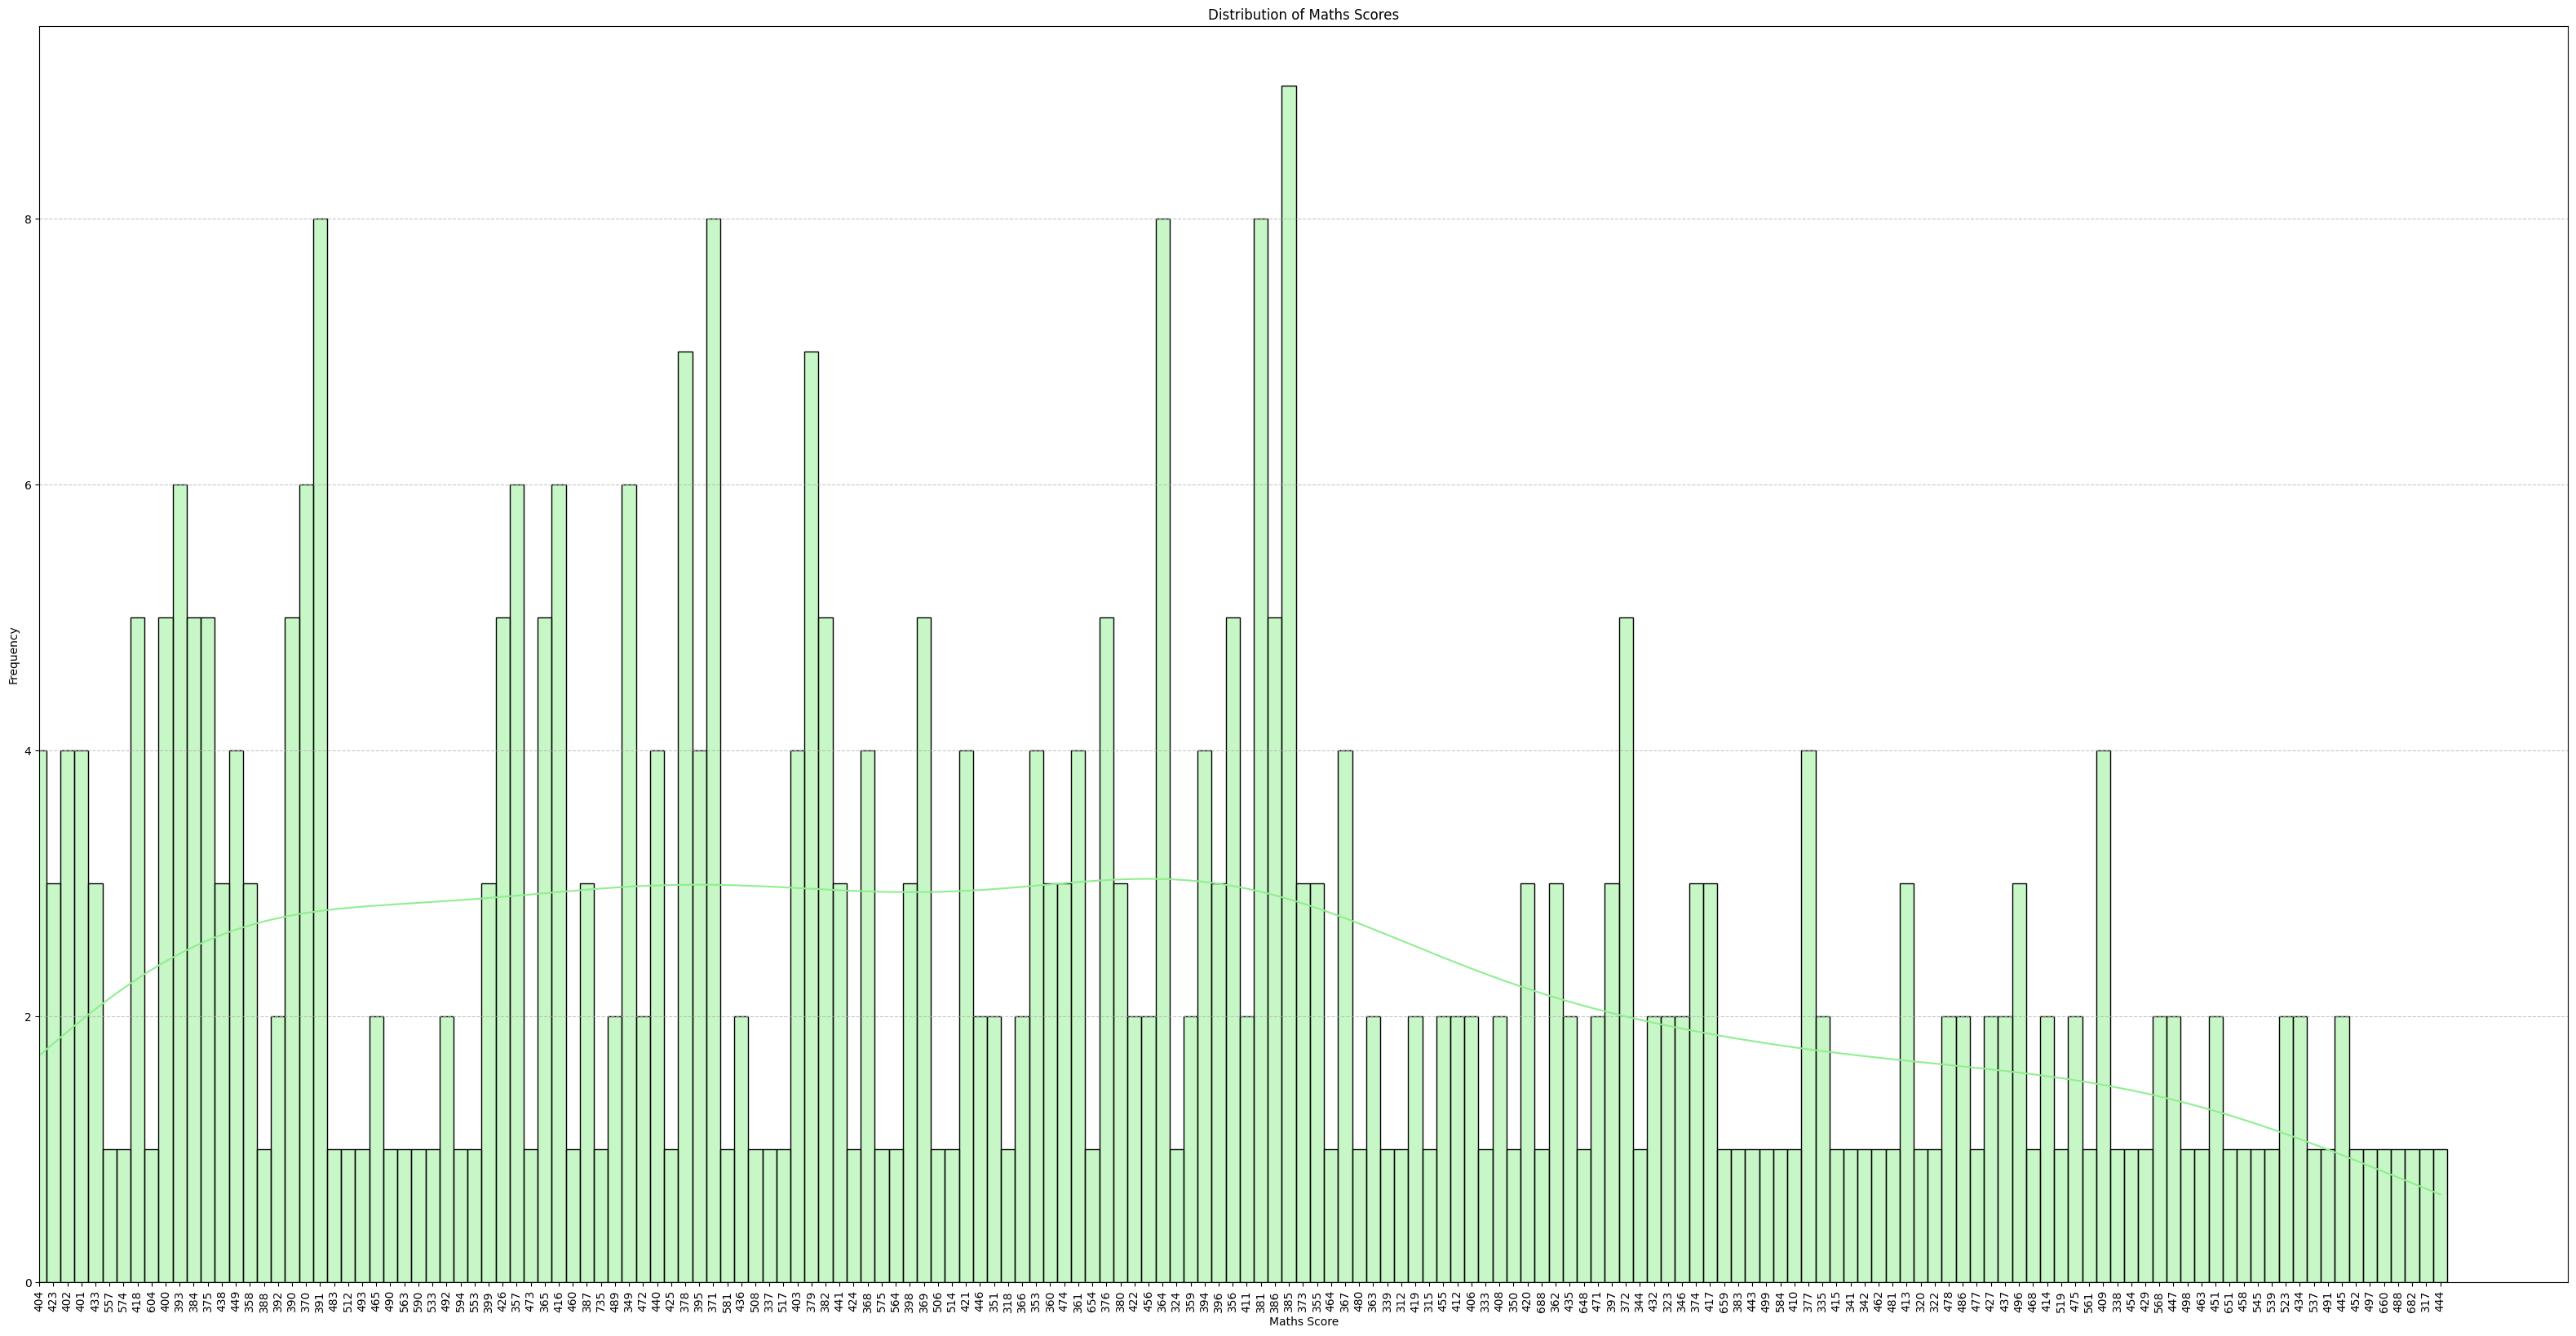

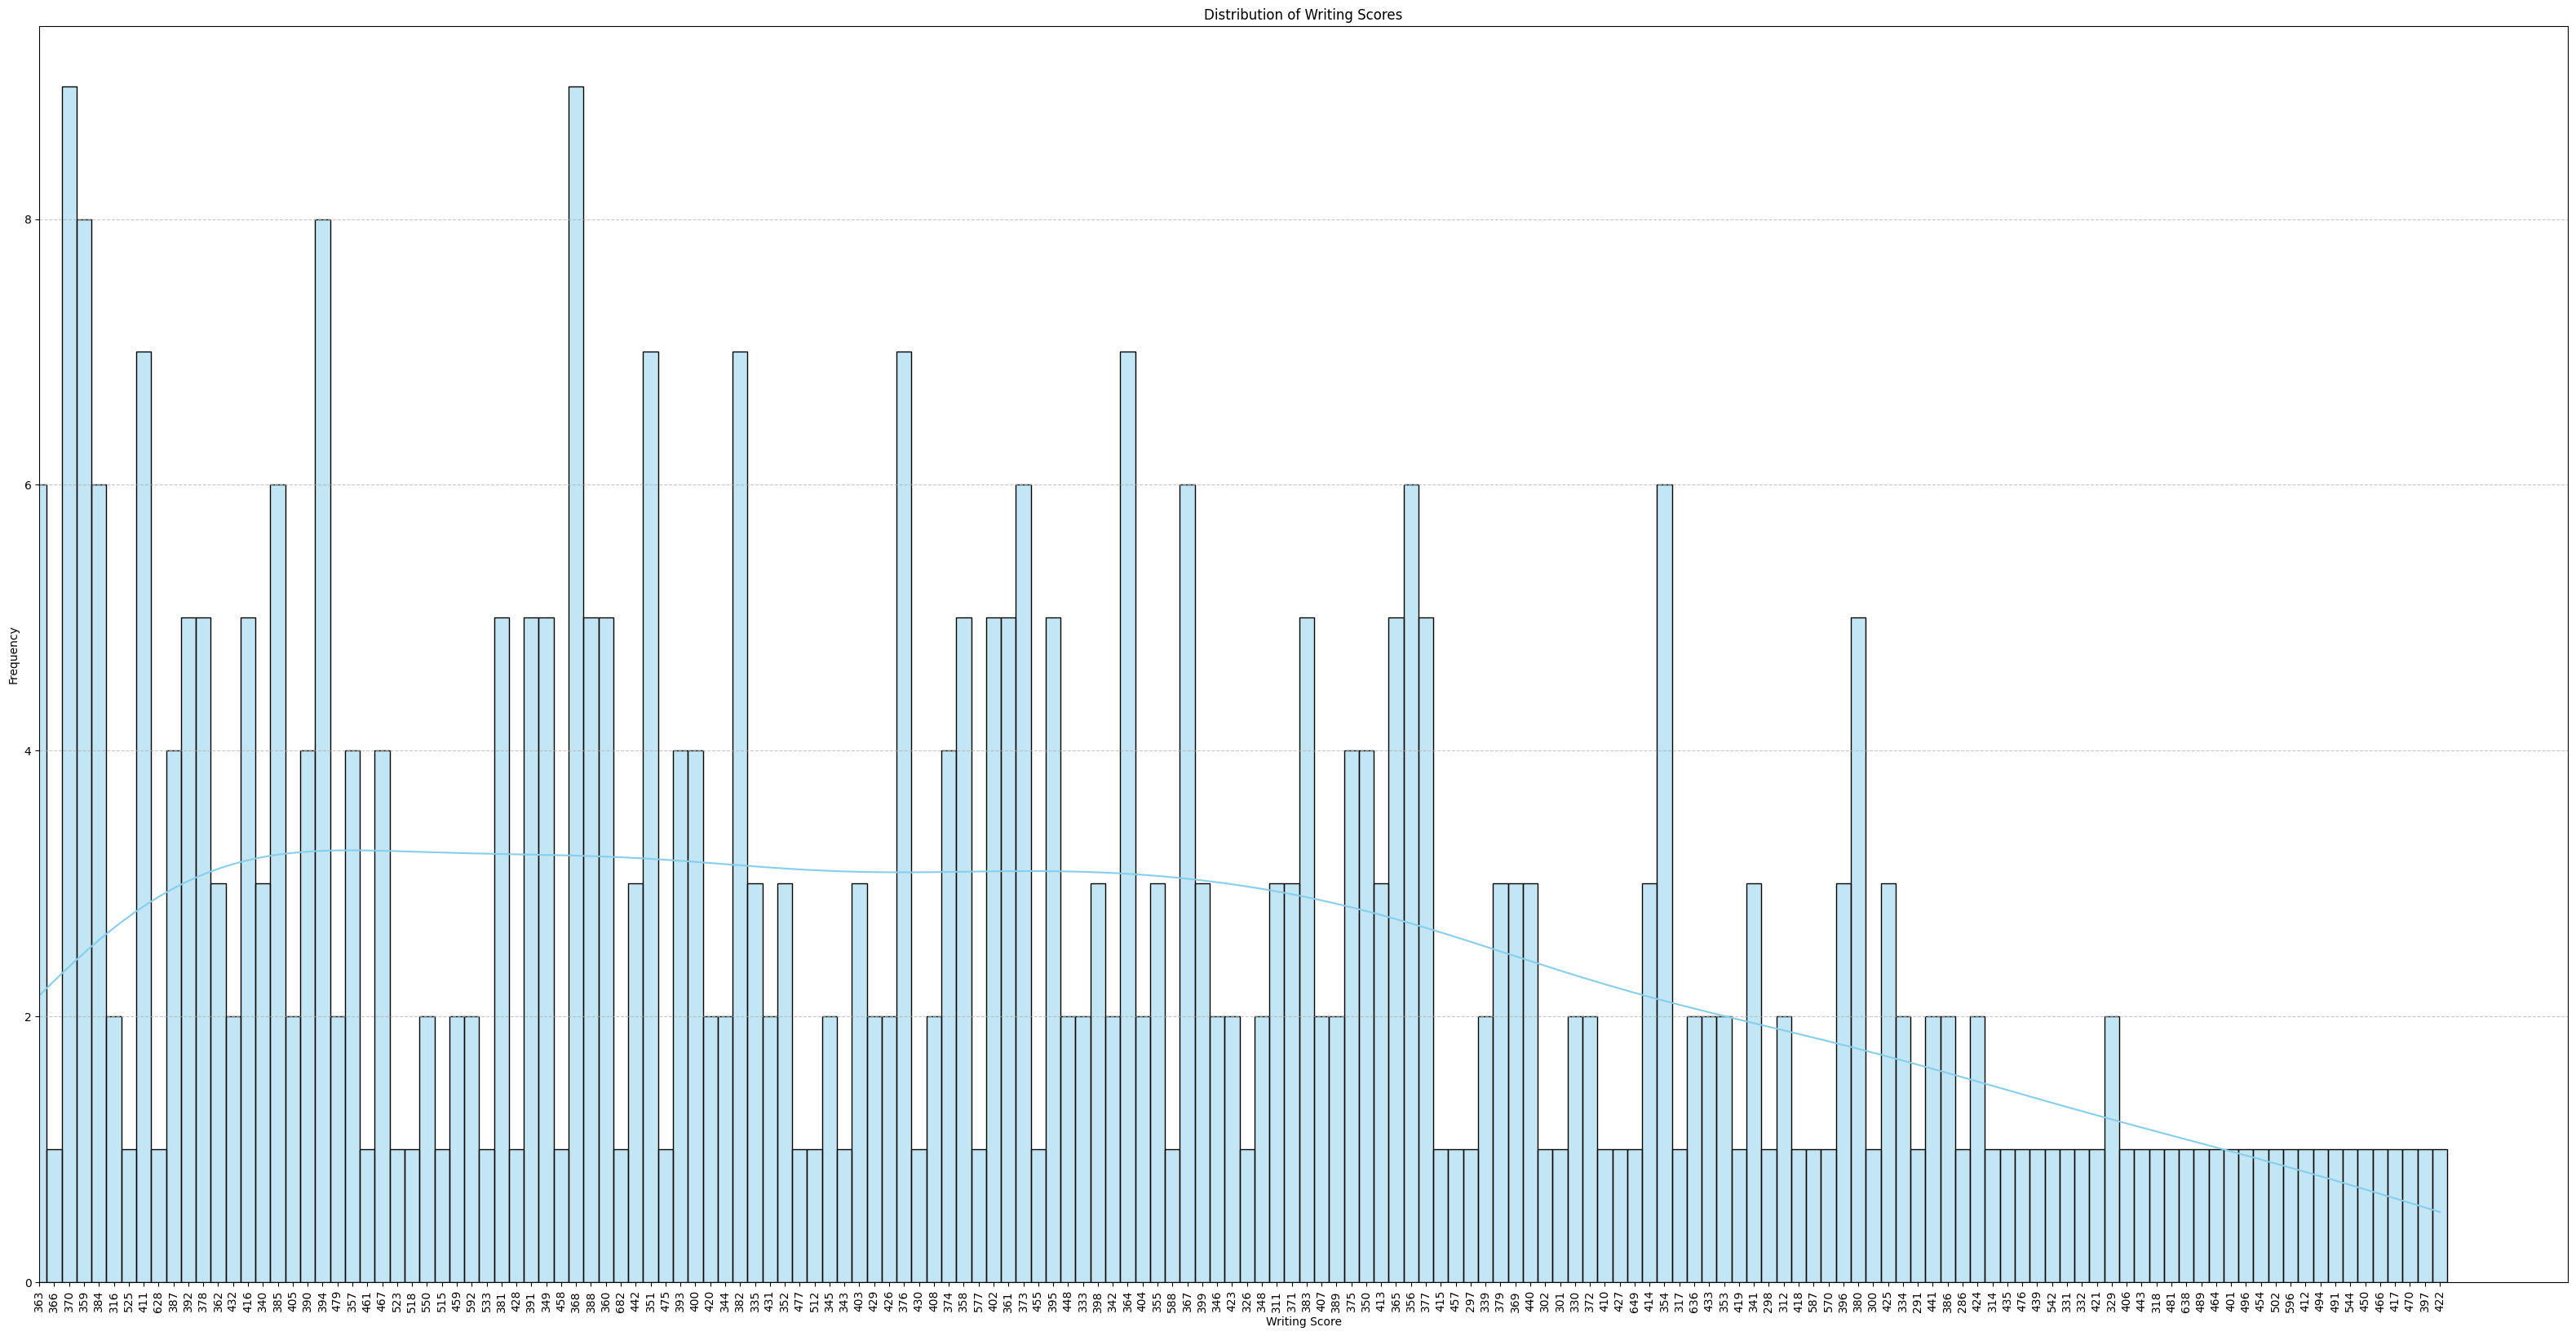

In [7]:
features = ['Num of SAT Test Takers', 'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score', 'SAT Writing Avg. Score']
colors = ['orange', 'salmon', 'lightgreen', 'skyblue']
titles = ['Distribution of Number of Students', 'Distribution of Reading Scores', 'Distribution of Maths Scores', 'Distribution of Writing Scores']
xlabels = ['Number of Students', 'Reading Score', 'Maths Score', 'Writing Score']

for feature, color, title, xlabel in zip(features, colors, titles, xlabels):
    plt.figure(figsize=(40, 20))
    ax = sns.histplot(data[feature], kde=True, bins=30, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlim(left=0)
    plt.show()

**PCA**

In [8]:
# Select features for clustering
features = data[['SAT Critical Reading Avg. Score', 'SAT Math Avg. Score', 'SAT Writing Avg. Score']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Dimensionality Reduction: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_features = pca.fit_transform(scaled_features)

**Kmeans BELOW**

C:\Users\stavros\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


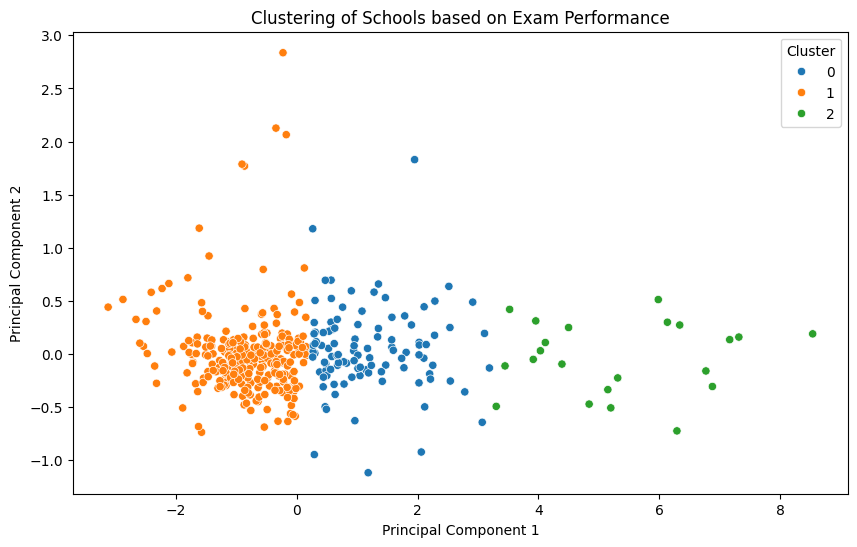

In [9]:
# Clustering: KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Get unique cluster labels
unique_clusters = np.unique(clusters)

# Define colors for each cluster
cluster_colors = {cluster: color for cluster, color in zip(unique_clusters, ['tab:blue', 'tab:orange', 'tab:green'])}

# Visualization: Plot clusters in reduced dimensionality space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=data['Cluster'], palette=cluster_colors, legend='full')
plt.title('Clustering of Schools based on Exam Performance')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

C:\Users\stavros\AppData\Local\Temp\ipykernel_14456\332179589.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
C:\Users\stavros\AppData\Local\Temp\ipykernel_14456\332179589.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2'])


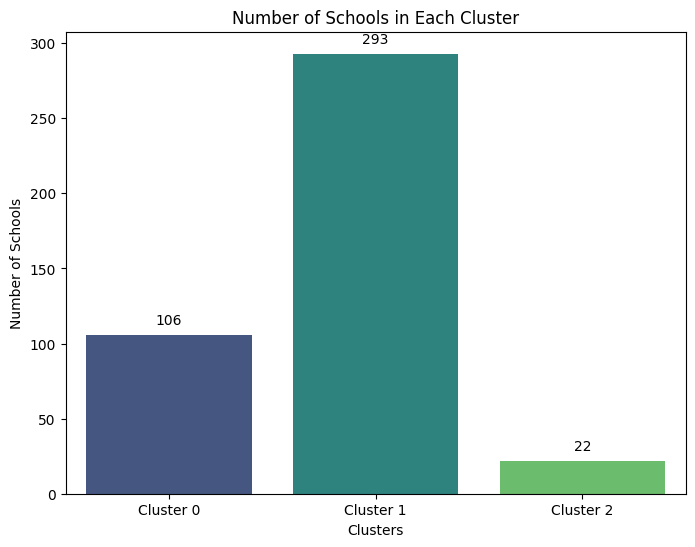

In [10]:
# Count the number of schools in each cluster
cluster_counts = data['Cluster'].value_counts()

# Sort the cluster counts from smallest to largest
cluster_counts = cluster_counts.sort_index()

# Create a bar plot showing the number of schools in each cluster
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')

# Annotate each bar with its value
for i, count in enumerate(cluster_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Number of Schools in Each Cluster')
plt.xlabel('Clusters')
plt.ylabel('Number of Schools')

# Set correct cluster labels
barplot.set_xticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2'])

plt.show()

In [11]:
# Iterate over each cluster
for cluster_num in range(3):
    cluster_schools = data[data['Cluster'] == cluster_num]['SCHOOL NAME']# Get the schools in the current cluster
    print(f"Cluster {cluster_num}:")# Print the cluster number
    
    # Print each school in the cluster
    for i, school in enumerate(cluster_schools, start=1):
        print(f"{i}. {school}")

    print()

Cluster 0:
1. CASCADES HIGH SCHOOL
2. PACE HIGH SCHOOL
3. URBAN ASSEMBLY SCHOOL OF DESIGN AND CONSTRUCTION, THE
4. NYC ISCHOOL
5. HIGH SCHOOL FOR ENVIRONMENTAL STUDIES
6. INSTITUTE FOR COLLABORATIVE EDUCATION
7. PROFESSIONAL PERFORMING ARTS HIGH SCHOOL
8. N.Y.C. MUSEUM SCHOOL
9. HIGH SCHOOL FOR HEALTH PROFESSIONS AND HUMAN SERVICES
10. LEADERSHIP AND PUBLIC SERVICE HIGH SCHOOL
11. MANHATTAN VILLAGE ACADEMY
12. HIGH SCHOOL OF ECONOMICS AND FINANCE
13. TALENT UNLIMITED HIGH SCHOOL
14. MURRY BERGTRAUM HIGH SCHOOL FOR BUSINESS CAREERS
15. JACQUELINE KENNEDY ONASSIS HIGH SCHOOL
16. REPERTORY COMPANY HIGH SCHOOL FOR THEATRE ARTS
17. HIGH SCHOOL FOR DUAL LANGUAGE AND ASIAN STUDIES
18. HIGH SCHOOL M560 s CITY AS SCHOOL
19. HARVEY MILK HIGH SCHOOL
20. THE HIGH SCHOOL OF FASHION INDUSTRIES
21. HUMANITIES PREPARATORY ACADEMY
22. ART AND DESIGN HIGH SCHOOL
23. LIFE SCIENCES SECONDARY SCHOOL
24. HIGH SCHOOL OF ARTS AND TECHNOLOGY
25. MANHATTAN / HUNTER SCIENCE HIGH SCHOOL
26. MANHATTAN CENTER FOR S

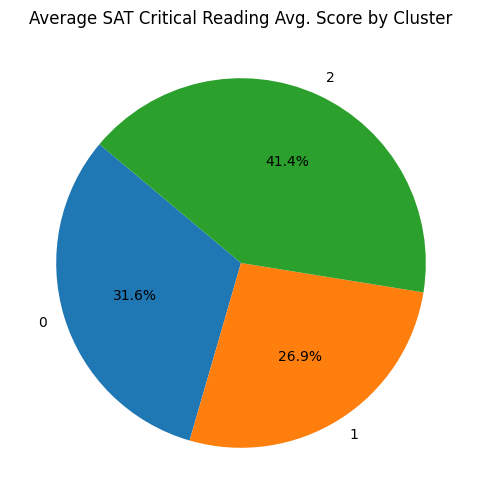

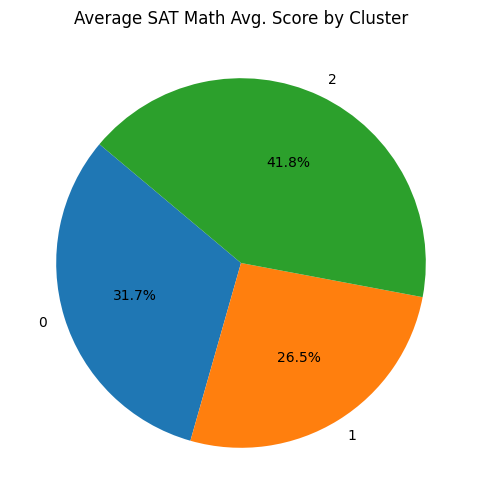

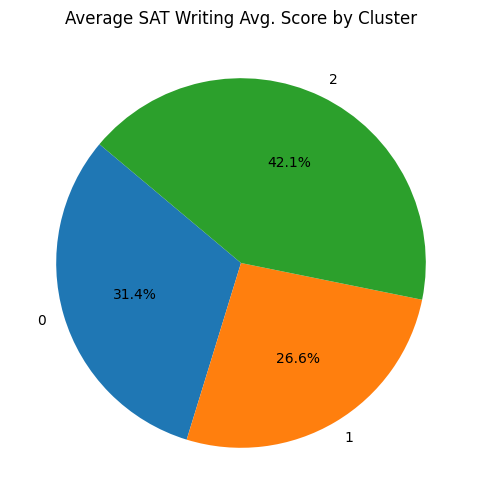

In [12]:
# Pie charts for each average score
for col in ['SAT Critical Reading Avg. Score', 'SAT Math Avg. Score', 'SAT Writing Avg. Score']:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    cluster_avg = data.groupby('Cluster')[col].mean()
    
    # Plot pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(cluster_avg, labels=cluster_avg.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Average {col} by Cluster')
    plt.show()

C:\Users\stavros\AppData\Local\Temp\ipykernel_14456\918897150.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=cluster_avg_num_test_takers.index, y=cluster_avg_num_test_takers.values, palette='viridis')


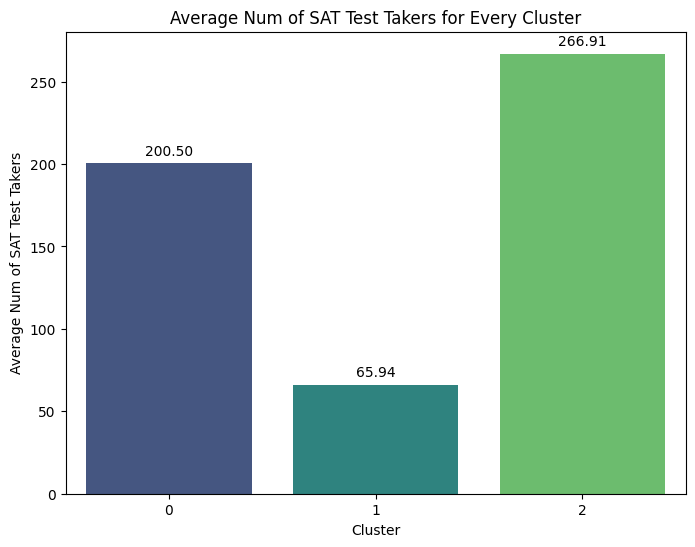

In [13]:
# We need to check how many took the test at their school. More specifically, the total average of every cluster

# Convert 'Num of SAT Test Takers' column to numeric
data['Num of SAT Test Takers'] = pd.to_numeric(data['Num of SAT Test Takers'], errors='coerce')

# Average Num of SAT Test Takers for every cluster
cluster_avg_num_test_takers = data.groupby('Cluster')['Num of SAT Test Takers'].mean()

plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=cluster_avg_num_test_takers.index, y=cluster_avg_num_test_takers.values, palette='viridis')
plt.title('Average Num of SAT Test Takers for Every Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Num of SAT Test Takers')

# Annotate bars with the final number of test takers
for i, num_test_takers in enumerate(cluster_avg_num_test_takers):
    barplot.text(i, num_test_takers + 5, f'{num_test_takers:.2f}', ha='center', fontsize=10)

plt.show()

**DBSCAN BELOW**

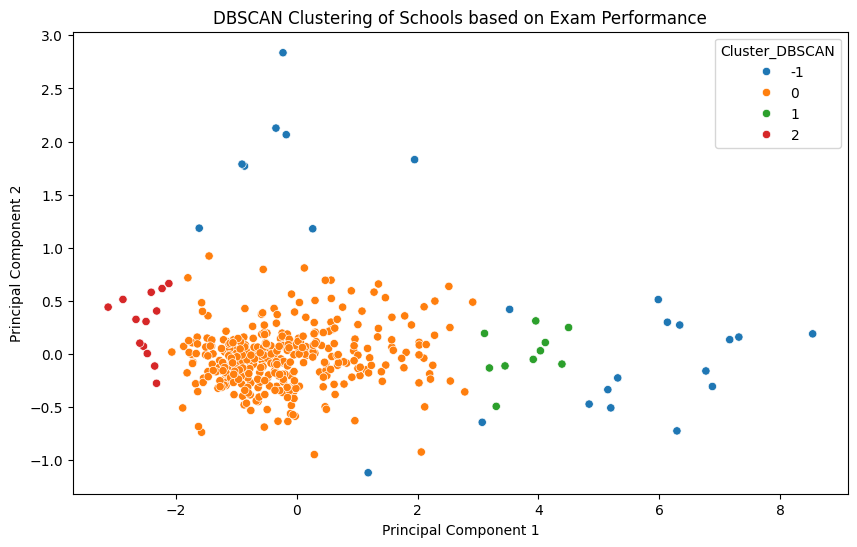

In [14]:
# Apply DBSCAN clustering algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_db = dbscan.fit_predict(scaled_features)

# Add cluster labels to the dataset
data['Cluster_DBSCAN'] = clusters_db

# Get unique cluster labels
unique_clusters_db = np.unique(clusters_db)

# Define colors for each cluster
cluster_colors_db = {cluster: color for cluster, color in zip(unique_clusters_db, sns.color_palette('tab10', len(unique_clusters_db)))}

# Visualization: Plot DBSCAN clusters in reduced dimensionality space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=data['Cluster_DBSCAN'], palette=cluster_colors_db, legend='full')
plt.title('DBSCAN Clustering of Schools based on Exam Performance')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

C:\Users\stavros\AppData\Local\Temp\ipykernel_14456\1387112060.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_db = sns.barplot(x=cluster_counts_db.index, y=cluster_counts_db.values, palette='viridis')


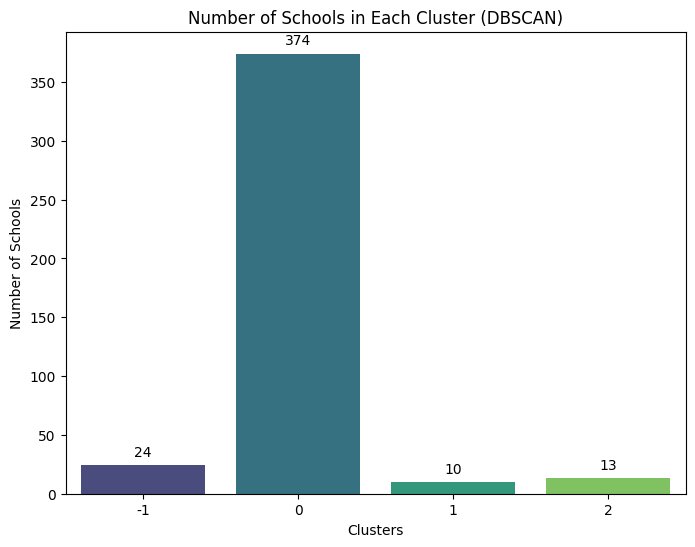

In [15]:
# Count the number of schools in each cluster
cluster_counts_db = data['Cluster_DBSCAN'].value_counts()

# Sort the cluster counts from smallest to largest
cluster_counts_db = cluster_counts_db.sort_index()

# Create a bar plot showing the number of schools in each cluster
plt.figure(figsize=(8, 6))
barplot_db = sns.barplot(x=cluster_counts_db.index, y=cluster_counts_db.values, palette='viridis')

# Annotate each bar with its value
for i, count in enumerate(cluster_counts_db):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Number of Schools in Each Cluster (DBSCAN)')
plt.xlabel('Clusters')
plt.ylabel('Number of Schools')

plt.show()

In [16]:
# Iterate over each cluster
for cluster_num in range(-1,3):
    # Get the schools in the current cluster
    cluster_schools = data[data['Cluster_DBSCAN'] == cluster_num]['SCHOOL NAME']
    
    # Print the cluster number
    print(f"Cluster {cluster_num}:")
    
    # Print each school in the cluster
    for i, school in enumerate(cluster_schools, start=1):
        print(f"{i}. {school}")
    
    # Add an empty line between clusters
    print()

Cluster -1:
1. LOWER EAST SIDE PREPARATORY HIGH SCHOOL
2. BARD HIGH SCHOOL EARLY COLLEGE
3. EMMA LAZARUS HIGH SCHOOL
4. PROFESSIONAL PERFORMING ARTS HIGH SCHOOL
5. BARUCH COLLEGE CAMPUS HIGH SCHOOL
6. ELEANOR ROOSEVELT HIGH SCHOOL
7. STUYVESANT HIGH SCHOOL
8. HIGH SCHOOL FOR DUAL LANGUAGE AND ASIAN STUDIES
9. MANHATTAN COMPREHENSIVE NIGHT AND DAY HIGH SCHOOL
10. BEACON HIGH SCHOOL
11. FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & ART AND PERFORMING ARTS
12. HIGH SCHOOL FOR MATHEMATICS, SCIENCE AND ENGINEERING AT CITY COLLEGE
13. BRONX HIGH SCHOOL OF SCIENCE
14. HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE
15. BROOKLYN TECHNICAL HIGH SCHOOL
16. BROOKLYN LATIN SCHOOL, THE
17. FRANKLIN DELANO ROOSEVELT HIGH SCHOOL
18. FRANKLIN DELANO ROOSEVELT YABC
19. FLUSHING INTERNATIONAL HIGH SCHOOL
20. TOWNSEND HARRIS HIGH SCHOOL
21. QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK COLLEGE
22. NEWCOMERS HIGH SCHOOL
23. STATEN ISLAND TECHNICAL HIGH SCHOOL
24. GED PLUS s CITYWIDE

Cluster 0:
1. HENRY ST

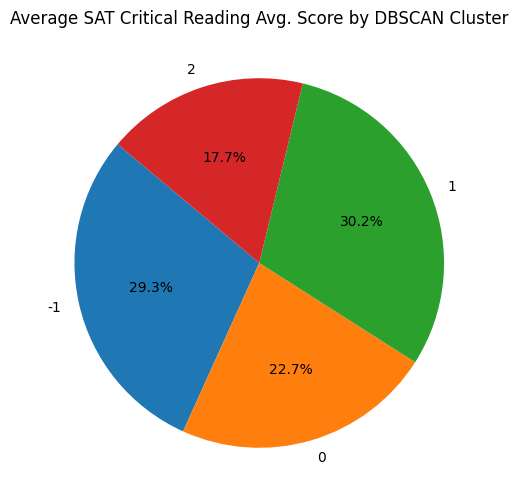

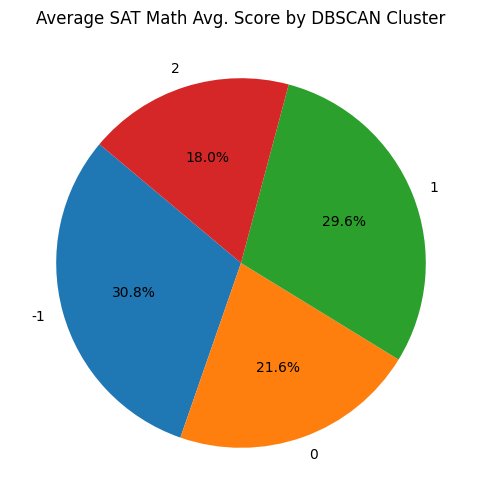

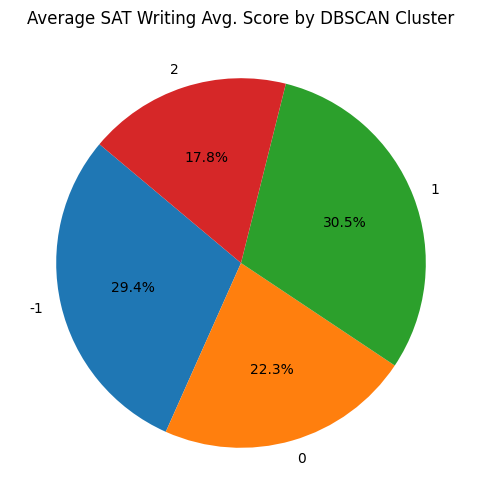

In [17]:
# Convert columns to numeric for calculations
for col in ['SAT Critical Reading Avg. Score', 'SAT Math Avg. Score', 'SAT Writing Avg. Score']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Group by DBSCAN clusters and calculate average scores
for col in ['SAT Critical Reading Avg. Score', 'SAT Math Avg. Score', 'SAT Writing Avg. Score']:
    cluster_avg_db = data.groupby('Cluster_DBSCAN')[col].mean()

    # Plot pie chart for average scores based on DBSCAN clusters
    plt.figure(figsize=(8, 6))
    plt.pie(cluster_avg_db, labels=cluster_avg_db.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Average {col} by DBSCAN Cluster')
    plt.show()

C:\Users\stavros\AppData\Local\Temp\ipykernel_14456\412424647.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=cluster_avg_num_test_takers.index, y=cluster_avg_num_test_takers.values, palette='viridis')


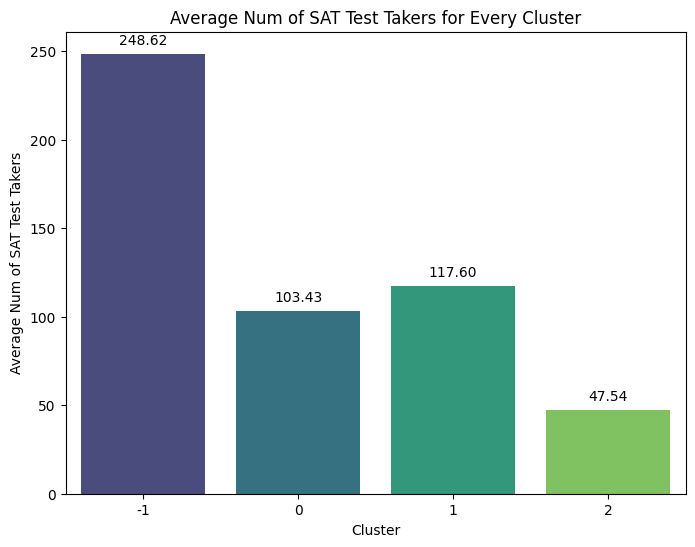

In [18]:
# Convert 'Num of SAT Test Takers' column to numeric
data['Num of SAT Test Takers'] = pd.to_numeric(data['Num of SAT Test Takers'], errors='coerce')

# Average Num of SAT Test Takers for every cluster
cluster_avg_num_test_takers = data.groupby('Cluster_DBSCAN')['Num of SAT Test Takers'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=cluster_avg_num_test_takers.index, y=cluster_avg_num_test_takers.values, palette='viridis')
plt.title('Average Num of SAT Test Takers for Every Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Num of SAT Test Takers')

# Annotate bars with the final number of test takers
for i, num_test_takers in enumerate(cluster_avg_num_test_takers):
    barplot.text(i, num_test_takers + 5, f'{num_test_takers:.2f}', ha='center', fontsize=10)

plt.show()

**Because from Kmeans the best Cluster is cluster 2 where it has less students than any other class and the results of the tests are better than the others. In the DBSCAN the -1 cluster had better results and had more students than the others. So we find the intersection of these two clusters in order to see which schools are the best for funding opportunities.**
                                                                                                                                                                                                                                                                                                                                         

In [19]:
cluster_num = 2 # Get the school names in the cluster with label 2 
cluster_schools_cluster = set(data[data['Cluster'] == cluster_num]['SCHOOL NAME'])

cluster_num_dbscan = -1 # Get the school names in the cluster with label -1
cluster_schools_dbscan = set(data[data['Cluster_DBSCAN'] == cluster_num_dbscan]['SCHOOL NAME'])

# Iintersection of school names between the two clusters
intersection_schools = cluster_schools_cluster.intersection(cluster_schools_dbscan)

# Print the school names in the intersection
print('The schools that deserve fundings')
print(f"School names in the intersection of Cluster {cluster_num} and Cluster {cluster_num_dbscan}:")
for i, school in enumerate(intersection_schools, start=1):
    print(f"{i}. {school}")

The schools that deserve fundings
School names in the intersection of Cluster 2 and Cluster -1:
1. QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK COLLEGE
2. STATEN ISLAND TECHNICAL HIGH SCHOOL
3. BROOKLYN LATIN SCHOOL, THE
4. HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE
5. FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & ART AND PERFORMING ARTS
6. BROOKLYN TECHNICAL HIGH SCHOOL
7. BEACON HIGH SCHOOL
8. HIGH SCHOOL FOR MATHEMATICS, SCIENCE AND ENGINEERING AT CITY COLLEGE
9. TOWNSEND HARRIS HIGH SCHOOL
10. BARUCH COLLEGE CAMPUS HIGH SCHOOL
11. ELEANOR ROOSEVELT HIGH SCHOOL
12. BRONX HIGH SCHOOL OF SCIENCE
13. STUYVESANT HIGH SCHOOL
14. BARD HIGH SCHOOL EARLY COLLEGE
